# 인공진

Part I. 인공신경망 및 딥러닝의 기초 </br>
10:00 - 10:50  신경망 기초, 역전파 알고리즘, 경사하강법, 딥러닝 실습을 위한 기본 용어 개념 설명 </br>
11:00 - 12:00  실습#1 : 개인 신용카드 대금 납부 예측  </br>
 </br>
Part II. 합성곱신경망(CNN) 및 순환신경망(RNN) </br>
13:00 - 13:50  합성곱 신경망, 순환신경망 개념 / 실습#3 : LSTM을 이용한 가상화폐(이더리움) 가격 예측</br>
 </br>
Part III. 딥러닝 비지도 모형 </br>
14:00 - 14:50 임베딩, 오토인코더, GAN  / 실습#4 : Autoencoder를 활용한 신용카드 이상 거래 감지 </br>

Part IV. 실전 Project </br>
15:00 - 15:50 데이터를 활용해 기업 부도 예측 </br>
</br>

[Wrap-up]</br>
16:00-17:00 수업 Wrap-up 및 금융과 딥러닝의 미래

# 1. 신경망을 이용한 분류 예제 : 개인 신용 부도 예측

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## A. Data 탐색하기

In [0]:
# Loading Data
credit_data = pd.read_csv('https://www.dropbox.com/s/972se2yv6cao3bg/UCI_Credit_Card_test.csv?dl=1')

# Inspecting Data; Preliminary Review 
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 25 columns):
ID                            10001 non-null int64
LIMIT_BAL                     10001 non-null float64
SEX                           10001 non-null int64
EDUCATION                     10001 non-null int64
MARRIAGE                      10001 non-null int64
AGE                           10001 non-null int64
PAY_0                         10001 non-null int64
PAY_2                         10001 non-null int64
PAY_3                         10001 non-null int64
PAY_4                         10001 non-null int64
PAY_5                         10001 non-null int64
PAY_6                         10001 non-null int64
BILL_AMT1                     10001 non-null float64
BILL_AMT2                     10001 non-null float64
BILL_AMT3                     10001 non-null float64
BILL_AMT4                     10001 non-null float64
BILL_AMT5                     10001 non-null float64
BILL_AMT6   

In [0]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,240000.0,2,2,1,37,-1,2,-1,-1,-1,0,1769.0,842.0,14015.0,0.0,1317.0,566.0,0.0,14015.0,0.0,1317.0,0.0,0.0,0
1,20001,220000.0,2,1,1,43,-1,-1,-1,-1,-1,-1,4009.0,1689.0,12370.0,12095.0,1832.0,4691.0,1689.0,12373.0,12099.0,1832.0,5001.0,10311.0,1
2,20002,100000.0,2,1,2,38,3,2,-1,-1,0,0,2156.0,1151.0,1151.0,35499.0,33051.0,36627.0,0.0,1151.0,35499.0,10000.0,6627.0,7000.0,0
3,20003,200000.0,2,1,1,39,-2,-2,-2,-2,-2,-2,5553.0,2294.0,359.0,0.0,353.0,342.0,2294.0,359.0,0.0,353.0,342.0,0.0,0
4,20004,400000.0,2,1,1,37,-1,0,-1,0,0,0,10677.0,31405.0,26717.0,25434.0,6973.0,9899.0,31008.0,26862.0,3000.0,2000.0,3000.0,0.0,0


In [0]:
print(credit_data.describe())

                 ID      LIMIT_BAL  ...       PAY_AMT6  default.payment.next.month
count  10001.000000   10001.000000  ...   10001.000000                10001.000000
mean   25000.000000  175857.014299  ...    5485.640436                    0.207779
std     2887.184355  131329.103983  ...   18680.315216                    0.405738
min    20000.000000   10000.000000  ...       0.000000                    0.000000
25%    22500.000000   60000.000000  ...     274.000000                    0.000000
50%    25000.000000  150000.000000  ...    1715.000000                    0.000000
75%    27500.000000  250000.000000  ...    4460.000000                    0.000000
max    30000.000000  780000.000000  ...  443001.000000                    1.000000

[8 rows x 25 columns]


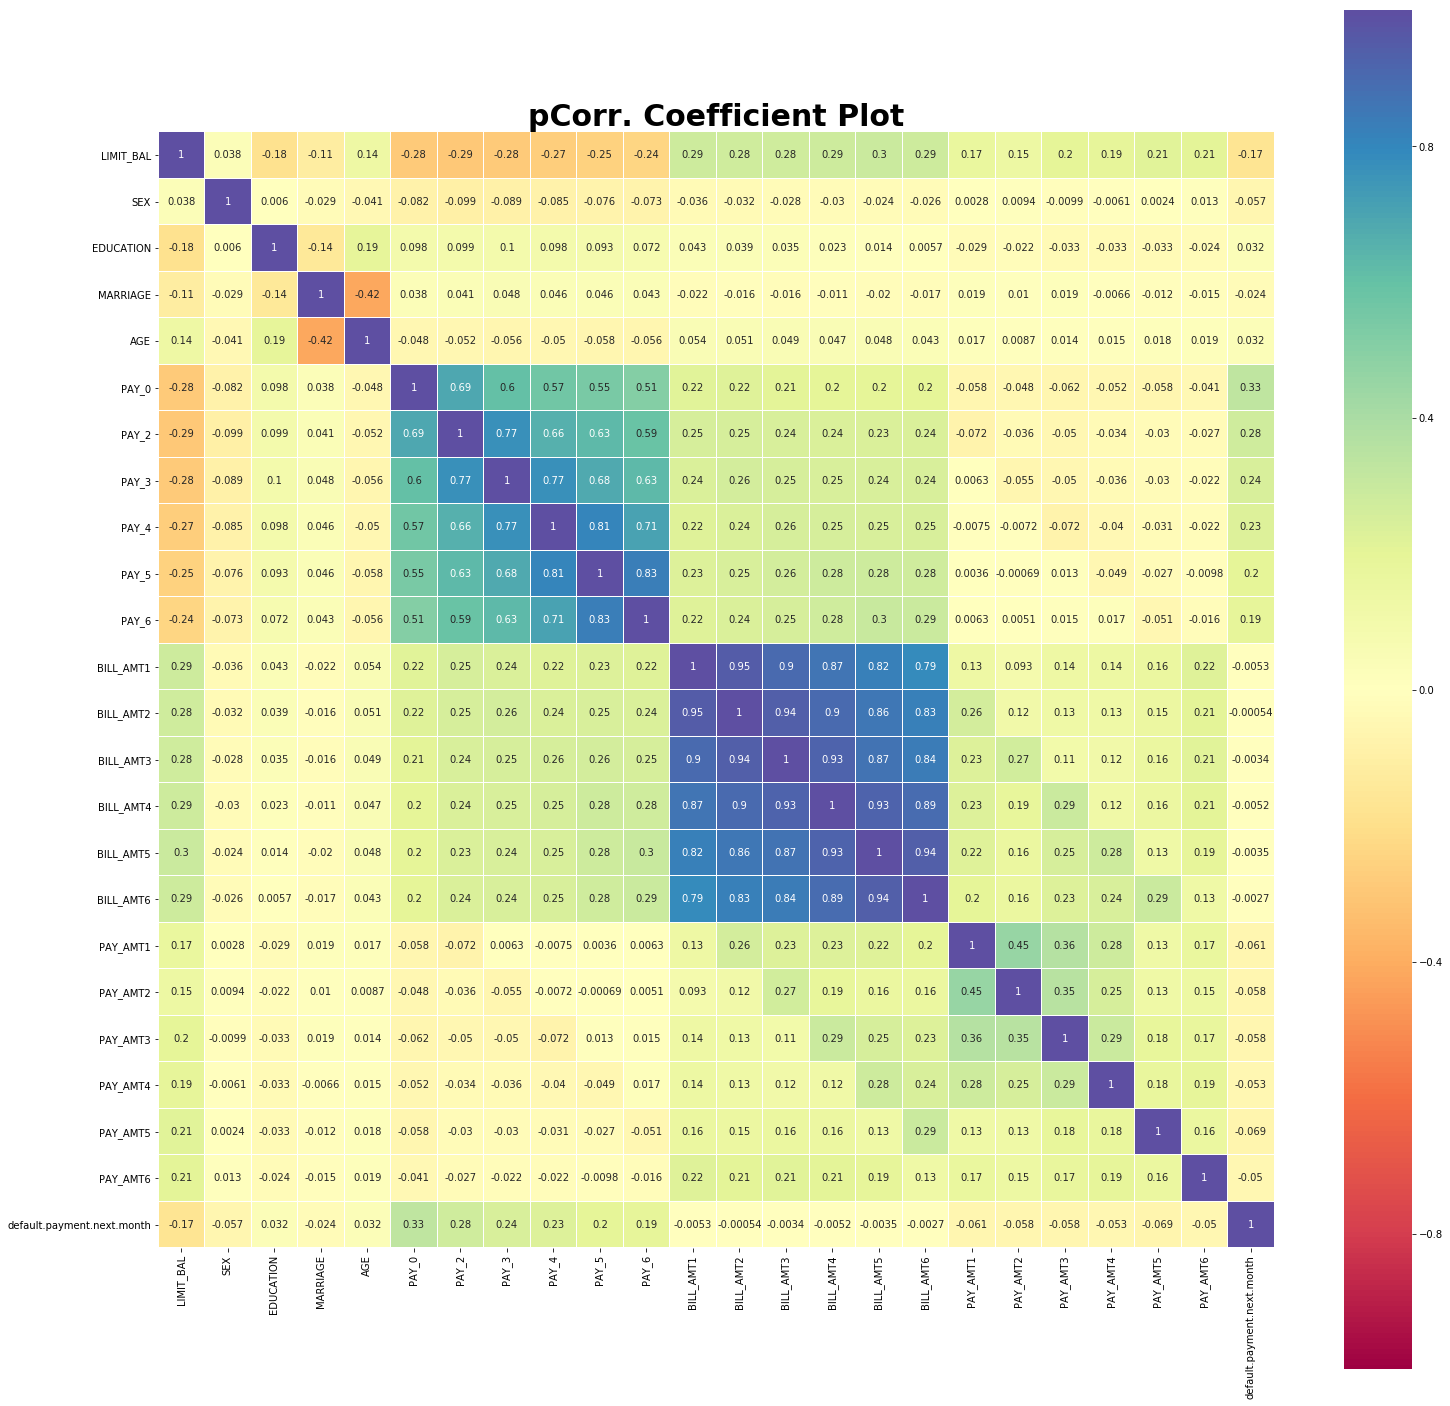

In [0]:
def BuildCorrPlot():

    plt.figure(figsize=(25,25))
    ax = plt.axes()
    corr = credit_data.drop(['ID'], axis=1).corr()
    sns.heatmap(corr, 
                vmax=1, 
                vmin=-1, 
                square=True, 
                annot=True, 
                cmap='Spectral', 
                linecolor="white", 
                linewidths=0.01, 
                ax=ax)
    ax.set_title('pCorr. Coefficient Plot',fontweight="bold", size=30)
    plt.show()

BuildCorrPlot()

In [0]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000,240000.0,2,2,1,37,-1,2,-1,-1,-1,0,1769.0,842.0,14015.0,0.0,1317.0,566.0,0.0,14015.0,0.0,1317.0,0.0,0.0,0
1,20001,220000.0,2,1,1,43,-1,-1,-1,-1,-1,-1,4009.0,1689.0,12370.0,12095.0,1832.0,4691.0,1689.0,12373.0,12099.0,1832.0,5001.0,10311.0,1
2,20002,100000.0,2,1,2,38,3,2,-1,-1,0,0,2156.0,1151.0,1151.0,35499.0,33051.0,36627.0,0.0,1151.0,35499.0,10000.0,6627.0,7000.0,0
3,20003,200000.0,2,1,1,39,-2,-2,-2,-2,-2,-2,5553.0,2294.0,359.0,0.0,353.0,342.0,2294.0,359.0,0.0,353.0,342.0,0.0,0
4,20004,400000.0,2,1,1,37,-1,0,-1,0,0,0,10677.0,31405.0,26717.0,25434.0,6973.0,9899.0,31008.0,26862.0,3000.0,2000.0,3000.0,0.0,0


In [0]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

inputs = credit_data.drop(['ID','default.payment.next.month'], axis=1).values
inputs = StandardScaler().fit_transform(inputs)

target = to_categorical(credit_data['default.payment.next.month']) 

In [0]:
# Calculating default Ratio
non_default = len(credit_data[credit_data['default.payment.next.month'] == 0])
default = len(credit_data[credit_data['default.payment.next.month'] == 1])
ratio = float(default/(non_default + default))
print('Default Ratio :', ratio)

Default Ratio : 0.20777922207779223


## B. 훈련데이터 및 검증데이터 분리

In [0]:
from sklearn.model_selection import train_test_split

def SplitDataSet(inputs, target):
    
    train_input, test_input, train_label, test_label = \
    train_test_split(inputs, target, test_size = 0.5, random_state=42)
    
    return train_input, test_input, train_label, test_label

train_input, test_input, train_label, test_label = SplitDataSet(inputs, target)

In [0]:
train_input.shape

(5000, 23)

In [0]:
### validation set
input_val = train_input[:3000]
partial_input_train = train_input[3000:]

label_val = train_label[:3000]
partial_label_train = train_label[3000:]

## C. 신경망 모델 구축

### 신경망 구조 정의하기

In [0]:
from keras import models
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

n_cols = inputs.shape[1]
early_stopping_monitor = EarlyStopping(patience = 2) # validation이 개선되지 않으면 stop
class_weight = {0:ratio, 1:1-ratio} 

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

옵티마이저 선택 및 모델 컴파일

In [0]:
from keras import optimizers

## sgd = optimizers.SGD(lr=0.01)
## model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

##  RMSprop(lr=0.001)
## model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = Adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

모델 Fitting

In [0]:
result = model.fit(partial_input_train,
                  partial_label_train,
                  epochs = 20,
                  batch_size = 128, 
                  validation_data=(input_val, label_val))

Train on 2000 samples, validate on 3000 samples
Epoch 1/20
2000/2000 [==============================] - 0s 213us/step - loss: 0.9313 - acc: 0.2720 - val_loss: 0.7222 - val_acc: 0.4613
Epoch 2/20
2000/2000 [==============================] - 0s 21us/step - loss: 0.6492 - acc: 0.6640 - val_loss: 0.5731 - val_acc: 0.7920
Epoch 3/20
2000/2000 [==============================] - 0s 20us/step - loss: 0.5457 - acc: 0.7985 - val_loss: 0.5254 - val_acc: 0.7967
Epoch 4/20
2000/2000 [==============================] - 0s 21us/step - loss: 0.5126 - acc: 0.8045 - val_loss: 0.5044 - val_acc: 0.8023
Epoch 5/20
2000/2000 [==============================] - 0s 20us/step - loss: 0.4948 - acc: 0.8100 - val_loss: 0.4928 - val_acc: 0.8063
Epoch 6/20
2000/2000 [==============================] - 0s 21us/step - loss: 0.4834 - acc: 0.8150 - val_loss: 0.4838 - val_acc: 0.8097
Epoch 7/20
2000/2000 [==============================] - 0s 21us/step - loss: 0.4746 - acc: 0.8170 - val_loss: 0.4756 - val_acc: 0.8157
Epoch 

## D. 결과 확인

### Train set과 Validation set의 Epoch 진행에 따른 Loss 변화

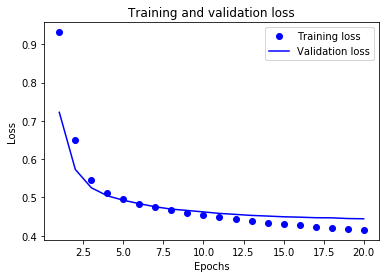

In [0]:
import matplotlib.pyplot as plt

acc = result.history['acc']
val_acc = result.history['val_acc']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Train set과 Validation set의 Epoch 진행에 따른 Accuracy 변화

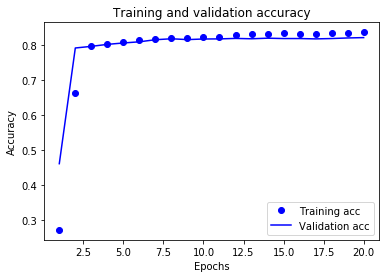

In [0]:
plt.clf()   # 그래프 초기화
acc = result.history['acc']
val_acc = result.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

### 왜 Epoch이 진행될수록 Accuracy가 계속 증가할까?

Overfitting 문제로 인해, Training set의 accuracy는 높은데 반해, Validataion set에 대해서는 정확도가 떨어진다. 

Epoch이 진행될수록 과적합이 심해지니, Epoch 수를 줄이고 다시 학습시킨 후 모형을 평가해보도록 한다.

fit()함수를 재호출하면 학습된 가중치에서 다시 시작하니, 다시 Sequential을 만들어 보자.

In [0]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = Adam, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_input, 
          train_label, 
          epochs = 5,
          batch_size = 64)

evaluation = model.evaluate(test_input, test_label)

Epoch 1/5
5000/5000 [==============================] - 0s 100us/step - loss: 0.5208 - acc: 0.7736
Epoch 2/5
5000/5000 [==============================] - 0s 22us/step - loss: 0.4487 - acc: 0.8190
Epoch 3/5
5000/5000 [==============================] - 0s 23us/step - loss: 0.4315 - acc: 0.8236
Epoch 4/5
5000/5000 [==============================] - 0s 23us/step - loss: 0.4215 - acc: 0.8272
Epoch 5/5
5001/5001 [==============================] - 0s 43us/step


In [0]:
print("Accuracy: ", evaluation[1])

Accuracy:  0.825834833069149


## E. 모형 개선

어떻게 모형을 개선할 수 있을까?

* Experiment#1 : 은닉 층(layer) 증가 혹은 감소 
* Experiment#2 : 은닉 노드(Node) 증가 혹은 감소
* Experiment#3 : 활성함수(Activation function)의 변화
* Experiment#4 : Optimizer의 변화
* Experiment#5 : 데이터 스케일의 변화